In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from bs4 import BeautifulSoup
import scipy.stats as stats
import seaborn as sns

In [17]:
aus_daily_ranks=pd.read_csv('/Users/khanhnguyen/UNI/S2_2023/Grand Challenges/Project 1 refined/aus_daily_ranks.csv')
global_daily_ranks=pd.read_csv('/Users/khanhnguyen/UNI/S2_2023/Grand Challenges/Project 1 refined/global_daily_ranks.csv')





# data cleaning the popularity and valence rankings
global_daily_ranks['popularity'] = pd.to_numeric(global_daily_ranks['popularity'], errors='coerce')
aus_daily_ranks['popularity'] = pd.to_numeric(aus_daily_ranks['popularity'], errors='coerce')
global_daily_ranks['valence'] = pd.to_numeric(global_daily_ranks['valence'], errors='coerce')
aus_daily_ranks['valence'] = pd.to_numeric(aus_daily_ranks['valence'], errors='coerce')

# change the date format for uniformity 
global_daily_ranks['date'] = pd.to_datetime(global_daily_ranks['date'], format='%d/%m/%Y')
aus_daily_ranks['date'] = pd.to_datetime(aus_daily_ranks['date'], format='%d/%m/%Y')

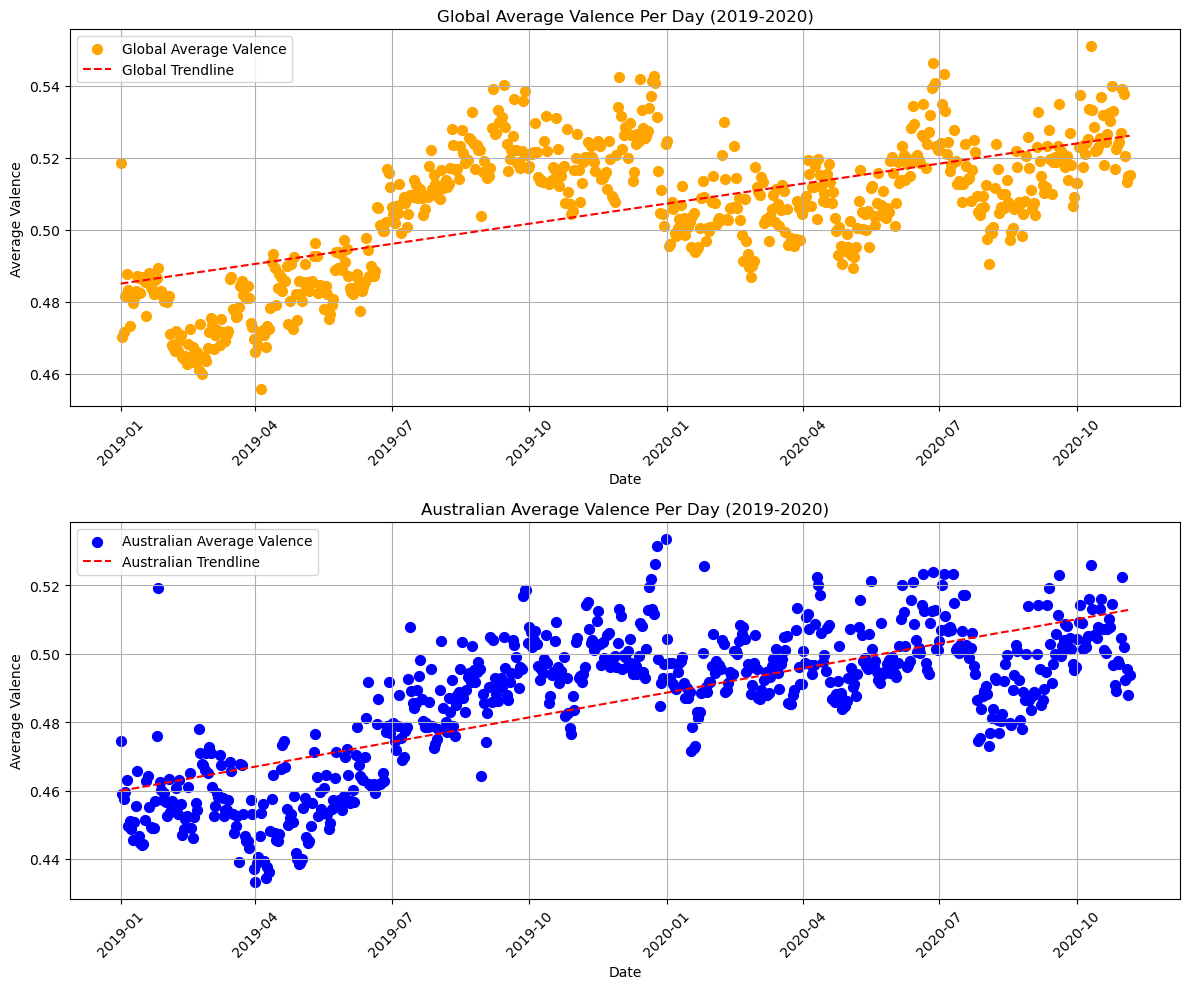

In [18]:
# Filter data for the period from the start of 2019 to the end of 2020
start_date = '2019-01-01'
end_date = '2020-12-31'

global_avg_valence = global_daily_ranks[(global_daily_ranks['date'] >= start_date) & (global_daily_ranks['date'] <= end_date)].groupby('date')['valence'].mean().reset_index()
aus_avg_valence = aus_daily_ranks[(aus_daily_ranks['date'] >= start_date) & (aus_daily_ranks['date'] <= end_date)].groupby('date')['valence'].mean().reset_index()

# Ensure 'valence' column is numeric
global_avg_valence['valence'] = pd.to_numeric(global_avg_valence['valence'])
aus_avg_valence['valence'] = pd.to_numeric(aus_avg_valence['valence'])

# Create two separate plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the global average valence in orange with a trendline
ax1.scatter(global_avg_valence['date'], global_avg_valence['valence'], color='orange', s=50, label='Global Average Valence')
z = np.polyfit(range(len(global_avg_valence)), global_avg_valence['valence'], 1)
p = np.poly1d(z)
ax1.plot(global_avg_valence['date'], p(range(len(global_avg_valence))), "r--", label='Global Trendline')

ax1.set_xlabel('Date')
ax1.set_ylabel('Average Valence')
ax1.set_title('Global Average Valence Per Day (2019-2020)')
ax1.grid(True)
ax1.legend()

# Plot the Australian average valence in blue with a trendline
ax2.scatter(aus_avg_valence['date'], aus_avg_valence['valence'], color='blue', s=50, label='Australian Average Valence')
z = np.polyfit(range(len(aus_avg_valence)), aus_avg_valence['valence'], 1)
p = np.poly1d(z)
ax2.plot(aus_avg_valence['date'], p(range(len(aus_avg_valence))), "r--", label='Australian Trendline')

ax2.set_xlabel('Date')
ax2.set_ylabel('Average Valence')
ax2.set_title('Australian Average Valence Per Day (2019-2020)')
ax2.grid(True)
ax2.legend()

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


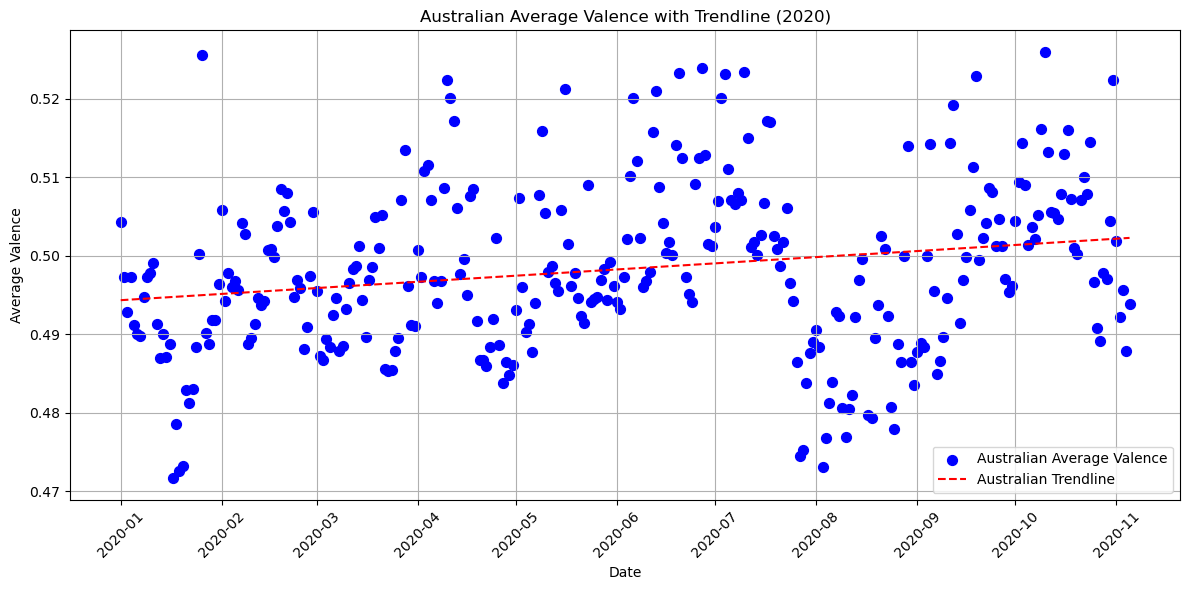

In [19]:
# Filter data for the year 2020 for Australia only
start_date = '2020-01-01'
end_date = '2020-12-31'
aus_avg_valence = aus_daily_ranks[(aus_daily_ranks['date'] >= start_date) & (aus_daily_ranks['date'] <= end_date)].groupby('date')['valence'].mean().reset_index()

# Ensure 'valence' column is numeric
aus_avg_valence['valence'] = pd.to_numeric(aus_avg_valence['valence'])

# Create a single plot for Australian average valence with a trendline
plt.figure(figsize=(12, 6))
plt.scatter(aus_avg_valence['date'], aus_avg_valence['valence'], color='blue', s=50, label="Australian Average Valence")
z = np.polyfit(range(len(aus_avg_valence)), aus_avg_valence['valence'], 1)
p = np.poly1d(z)
plt.plot(aus_avg_valence['date'], p(range(len(aus_avg_valence))), "r--", label='Australian Trendline')

plt.xlabel('Date')
plt.ylabel('Average Valence')
plt.title('Australian Average Valence with Trendline (2020)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


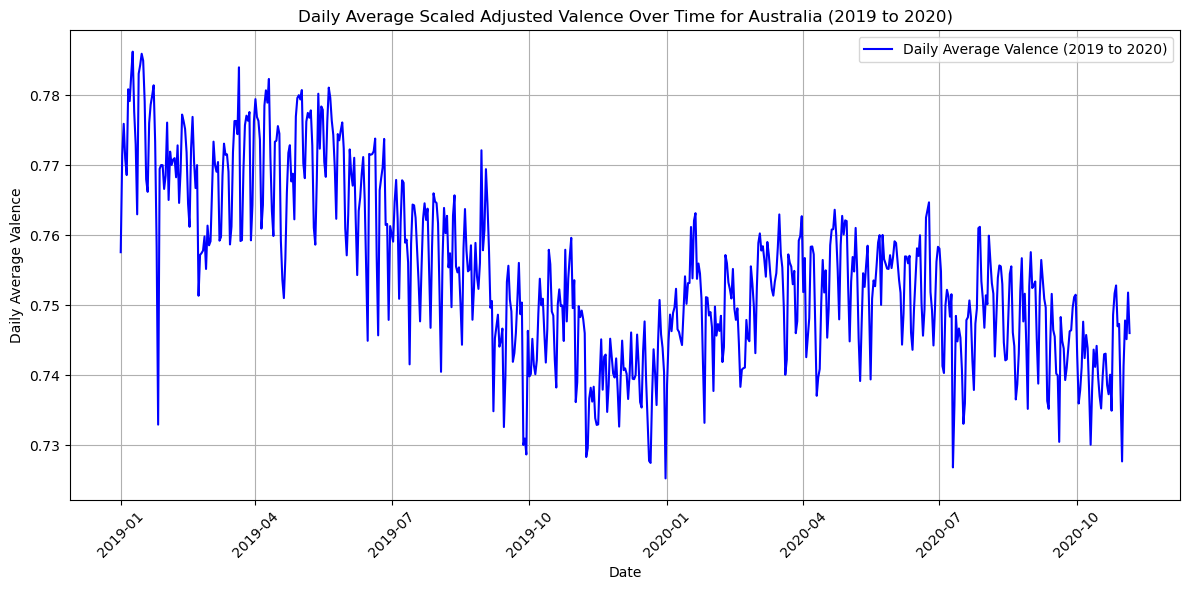

In [20]:
# calculate new adjusted valence by popularity, this is calculated by valence x popularity
global_daily_ranks['adjusted_valence_popularity'] = global_daily_ranks['valence'] * global_daily_ranks['position']
aus_daily_ranks['adjusted_valence_popularity'] = aus_daily_ranks['valence'] * (1-aus_daily_ranks['position'])

#normalising adjusted valence to have range from 0 to 1
min_val = aus_daily_ranks['adjusted_valence_popularity'].min()
max_val = aus_daily_ranks['adjusted_valence_popularity'].max()
aus_daily_ranks['scaled_adjusted_valence'] = (aus_daily_ranks['adjusted_valence_popularity'] - min_val) / (max_val - min_val)
aus_daily_ranks.tail()



# Assuming you have already calculated 'scaled_adjusted_valence' and have the necessary dataframes

# Filter the dataset for 2019 and 2020
start_date_2019 = pd.Timestamp("2019-01-01")
end_date_2020 = pd.Timestamp("2020-12-31")

data_2019_to_2020 = aus_daily_ranks[(aus_daily_ranks["date"] >= start_date_2019) & (aus_daily_ranks["date"] <= end_date_2020)]

# Calculate the daily average of scaled_adjusted_valence for 2019 to 2020
daily_avg_valence_2019_to_2020 = data_2019_to_2020.groupby('date')['scaled_adjusted_valence'].mean().reset_index()

# Create a line graph for the daily average valence from 2019 to 2020
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_valence_2019_to_2020['date'], daily_avg_valence_2019_to_2020['scaled_adjusted_valence'], color='blue', label='Daily Average Valence (2019 to 2020)')

plt.xlabel('Date')
plt.ylabel('Daily Average Valence')
plt.title('Daily Average Scaled Adjusted Valence Over Time for Australia (2019 to 2020)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



In [21]:
# Filter data for the year 2020
start_date = '2020-01-01'
end_date = '2020-12-31'
data_2020 = aus_daily_ranks[(aus_daily_ranks['date'] >= start_date) & (aus_daily_ranks['date'] <= end_date)]

# Add a small constant to prevent division by zero or negative values
epsilon = 1e-6  # Small positive constant

# Calculate 'log_ratio' with added epsilon for 2020
data_2020['log_ratio'] = np.log((data_2020['scaled_adjusted_valence'] + epsilon)/(baseline_valence_2019 + epsilon))

# Group data by date and calculate the mean of 'log_ratio' for 2020
average_log_ratio_2020 = data_2020.groupby('date')['log_ratio'].mean().reset_index()

# Create a scatter plot for 'log_ratio' in 2020
plt.figure(figsize=(12, 6))
plt.scatter(average_log_ratio_2020['date'], average_log_ratio_2020['log_ratio'], color='blue', label='Log Ratio (2020)', s=50)

# Calculate and plot the trendline for 'log_ratio' in 2020
z = np.polyfit(range(len(average_log_ratio_2020)), average_log_ratio_2020['log_ratio'], 1)
p = np.poly1d(z)
plt.plot(average_log_ratio_2020['date'], p(range(len(average_log_ratio_2020))), "r--", label='Trendline')

plt.xlabel('Date')
plt.ylabel('Log Ratio')
plt.title('Log Ratio of Scaled Adjusted Valence (2020) with Trendline')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


NameError: name 'baseline_valence_2019' is not defined

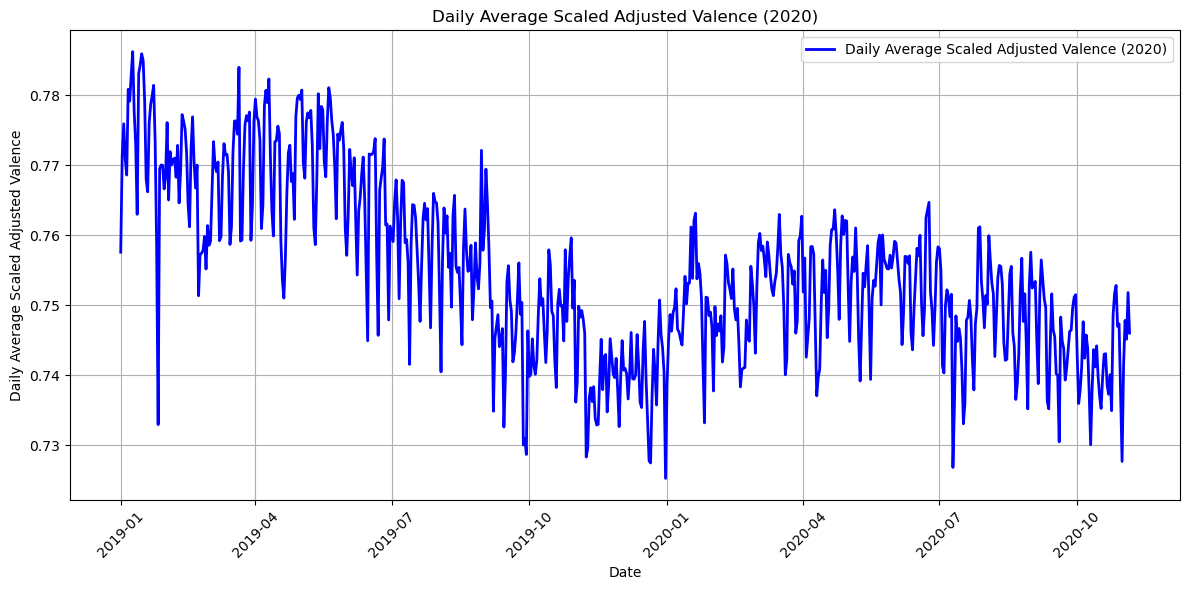

In [22]:
# Filter data for the year 2020
start_date = '2019-01-01'
end_date = '2020-12-31'
data_2020 = aus_daily_ranks[(aus_daily_ranks['date'] >= start_date) & (aus_daily_ranks['date'] <= end_date)]

# Calculate daily average 'scaled_adjusted_valence' for 2020
daily_average_2020 = data_2020.groupby('date')['scaled_adjusted_valence'].mean().reset_index()

# Create a line plot for daily average 'scaled_adjusted_valence' in 2020
plt.figure(figsize=(12, 6))
plt.plot(daily_average_2020['date'], daily_average_2020['scaled_adjusted_valence'], color='blue', label='Daily Average Scaled Adjusted Valence (2020)', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Daily Average Scaled Adjusted Valence')
plt.title('Daily Average Scaled Adjusted Valence (2020)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

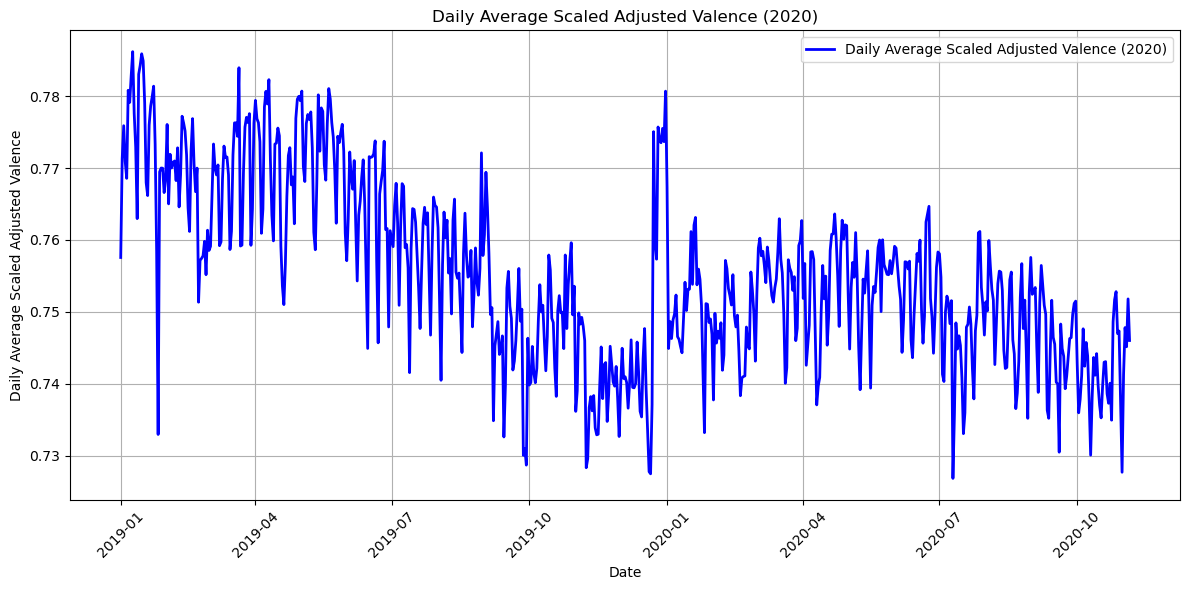

In [23]:
# Define the date range for Christmas carols
start_date = pd.Timestamp('2019-12-23')
end_date = pd.Timestamp('2020-1-1')

# Define the conditions for removal 
# these conditions are gotten from https://www.sciencedirect.com/science/article/pii/S1875952122000593?casa_token=eqaNCiRzhp8AAAAA:sOr20vzyos0m_XzQoWVwnoZc_HTNr_cMbeCjwh2CQghARiKaTlTrX2VVNXjpw6SB_g1UN9Ic7XU#sec3.3.1
condition_d = 0.64
condition_e = 0.60
condition_v = 0.56

numeric_columns = ['danceability', 'energy', 'valence']
aus_daily_ranks[numeric_columns] = aus_daily_ranks[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Create a mask based on the conditions and date range
mask = (
    (aus_daily_ranks['date'] >= start_date) & (aus_daily_ranks['date'] <= end_date) &
    (aus_daily_ranks['danceability'] > condition_d) & (aus_daily_ranks['energy'] > condition_e) & (aus_daily_ranks['valence'] > condition_v)
)

# Filter the dataset to keep rows that don't meet the conditions
filtered_dataset = aus_daily_ranks[~mask]

# Filter data for the year 2020
start_date = '2019-01-01'
end_date = '2020-12-31'
data_2020 = filtered_dataset[(filtered_dataset['date'] >= start_date) & (filtered_dataset['date'] <= end_date)]

# Calculate daily average 'scaled_adjusted_valence' for 2020
daily_average_2020 = data_2020.groupby('date')['scaled_adjusted_valence'].mean().reset_index()

# Create a line plot for daily average 'scaled_adjusted_valence' in 2020
plt.figure(figsize=(12, 6))
plt.plot(daily_average_2020['date'], daily_average_2020['scaled_adjusted_valence'], color='blue', label='Daily Average Scaled Adjusted Valence (2020)', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Daily Average Scaled Adjusted Valence')
plt.title('Daily Average Scaled Adjusted Valence (2020)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()




In [24]:
# Load the stringency data
stringency = pd.read_csv('/Users/khanhnguyen/UNI/S2_2023/Grand Challenges/owid-covid-data.csv')

# Filter data for Australia
aus_stringency = stringency[stringency['location'] == 'Australia']
aus_stringency['date'] = pd.to_datetime(aus_stringency['date'])

# Define the date range
start_date = pd.Timestamp("2019-01-01")
end_date = pd.Timestamp("2020-12-27")

# Filter aus_stringency based on the date range and select relevant columns
filtered_aus_stringency = aus_stringency[(aus_stringency['date'] >= start_date) & (aus_stringency['date'] <= end_date)]
filtered_aus_stringency = filtered_aus_stringency[['date', 'stringency_index', 'new_cases_per_million']]

# Load aus_daily_ranks data (assuming it has been defined previously)
avg = aus_daily_ranks[['date', 'log_ratio', 'scaled_adjusted_valence', 'valence', 'danceability', 'energy', 'sadness_norm2', 'popularity']]

# Merge the dataframes on the 'date' column
merged_df = pd.merge(avg, filtered_aus_stringency, on='date', how='inner')

# Save the merged data to a CSV file
merged_df.to_csv('australia_data_final.csv', index=False)

# Calculate the average log_ratio by stringency_index
avg = merged_df.groupby('stringency_index')['log_ratio'].mean().reset_index()

# Create a DataFrame from the average data
df = pd.DataFrame(avg)

# Create a scatter plot with trendline and confidence interval
plt.figure(figsize=(10, 6))
sns.regplot(x='stringency_index', y='log_ratio', data=df, color='blue', scatter_kws={'s': 50}, label='Data Points')
sns.regplot(x='stringency_index', y='log_ratio', data=df, ci=95, color='red', scatter=False, label='Trendline with 95% CI')

plt.title('Stringency Index Over Time')
plt.xlabel('Stringency Index')
plt.ylabel('Log Ratio')
plt.grid(True)
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


/var/folders/50/6zclk4957ygc468lz_x8jjt80000gn/T/ipykernel_25374/3462603412.py:2: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  stringency = pd.read_csv('/Users/khanhnguyen/UNI/S2_2023/Grand Challenges/owid-covid-data.csv')
/var/folders/50/6zclk4957ygc468lz_x8jjt80000gn/T/ipykernel_25374/3462603412.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_stringency['date'] = pd.to_datetime(aus_stringency['date'])


KeyError: "['log_ratio'] not in index"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the stringency data
stringency = pd.read_csv('/Users/khanhnguyen/UNI/S2_2023/Grand Challenges/owid-covid-data.csv')

# Filter data for Australia
aus_stringency = stringency[stringency['location'] == 'Australia']
aus_stringency['date'] = pd.to_datetime(aus_stringency['date'])

# Define the date range
start_date = pd.Timestamp("2019-01-01")
end_date = pd.Timestamp("2020-12-27")

# Filter aus_stringency based on the date range and select relevant columns
filtered_aus_stringency = aus_stringency[(aus_stringency['date'] >= start_date) & (aus_stringency['date'] <= end_date)]
filtered_aus_stringency = filtered_aus_stringency[['date', 'stringency_index', 'new_cases_per_million']]

# Load aus_daily_ranks data (assuming it has been defined previously)
avg = aus_daily_ranks[['date', 'scaled_adjusted_valence']]  # Use 'scaled_adjusted_valence' instead of 'log_ratio'

# Merge the dataframes on the 'date' column
merged_df = pd.merge(avg, filtered_aus_stringency, on='date', how='inner')

# Save the merged data to a CSV file
merged_df.to_csv('australia_data.csv', index=False)

# Group data by 'stringency_index' and calculate the average 'scaled_adjusted_valence'
avg_by_stringency = merged_df.groupby('stringency_index')['scaled_adjusted_valence'].mean().reset_index()

# Create a scatter plot with trendline and confidence interval
plt.figure(figsize=(10, 6))
sns.regplot(x='stringency_index', y='scaled_adjusted_valence', data=avg_by_stringency, color='blue', scatter_kws={'s': 50}, label='Data Points')
sns.regplot(x='stringency_index', y='scaled_adjusted_valence', data=avg_by_stringency, ci=95, color='red', scatter=False, label='Trendline with 95% CI')

plt.title('Stringency Index vs. Average Scaled Adjusted Valence')
plt.xlabel('Stringency Index')
plt.ylabel('Average Scaled Adjusted Valence')
plt.grid(True)
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


/var/folders/50/6zclk4957ygc468lz_x8jjt80000gn/T/ipykernel_25374/3473805108.py:6: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  stringency = pd.read_csv('/Users/khanhnguyen/UNI/S2_2023/Grand Challenges/owid-covid-data.csv')
/var/folders/50/6zclk4957ygc468lz_x8jjt80000gn/T/ipykernel_25374/3473805108.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_stringency['date'] = pd.to_datetime(aus_stringency['date'])


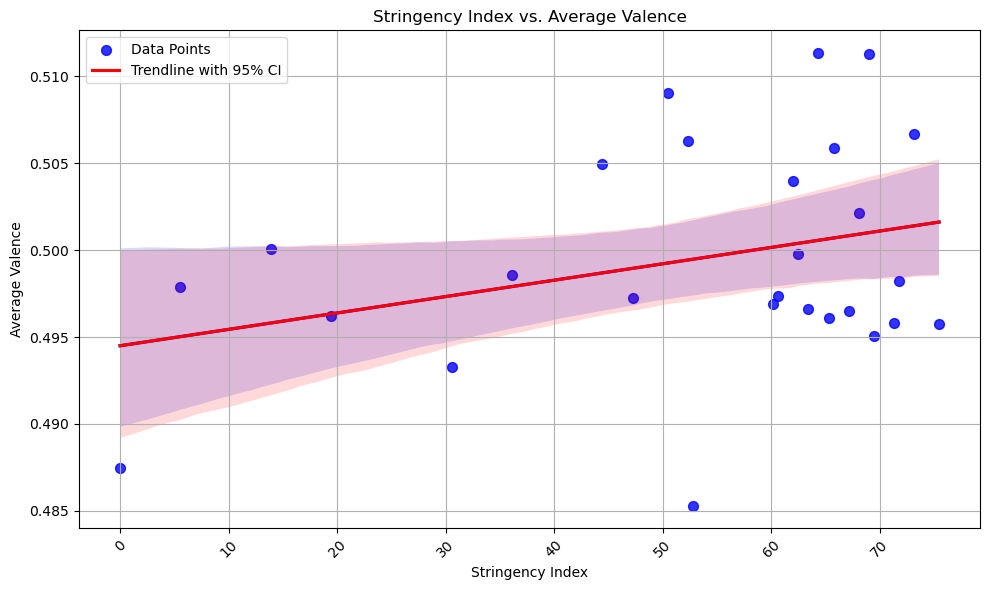

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the stringency data
stringency = pd.read_csv('/Users/khanhnguyen/UNI/S2_2023/Grand Challenges/owid-covid-data.csv')

# Filter data for Australia
aus_stringency = stringency[stringency['location'] == 'Australia']
aus_stringency['date'] = pd.to_datetime(aus_stringency['date'])

# Define the date range
start_date = pd.Timestamp("2019-01-01")
end_date = pd.Timestamp("2020-12-27")

# Filter aus_stringency based on the date range and select relevant columns
filtered_aus_stringency = aus_stringency[(aus_stringency['date'] >= start_date) & (aus_stringency['date'] <= end_date)]
filtered_aus_stringency = filtered_aus_stringency[['date', 'stringency_index', 'new_cases_per_million']]

# Load aus_daily_ranks data (assuming it has been defined previously)
avg = aus_daily_ranks[['date', 'valence']]  # Use 'valence' instead of 'scaled_adjusted_valence'

# Merge the dataframes on the 'date' column
merged_df = pd.merge(avg, filtered_aus_stringency, on='date', how='inner')

# Save the merged data to a CSV file
merged_df.to_csv('australia_data.csv', index=False)

# Group data by 'stringency_index' and calculate the average 'valence'
avg_by_stringency = merged_df.groupby('stringency_index')['valence'].mean().reset_index()

# Create a scatter plot with trendline and confidence interval
plt.figure(figsize=(10, 6))
sns.regplot(x='stringency_index', y='valence', data=avg_by_stringency, color='blue', scatter_kws={'s': 50}, label='Data Points')
sns.regplot(x='stringency_index', y='valence', data=avg_by_stringency, ci=95, color='red', scatter=False, label='Trendline with 95% CI')

plt.title('Stringency Index vs. Average Valence')
plt.xlabel('Stringency Index')
plt.ylabel('Average Valence')
plt.grid(True)
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


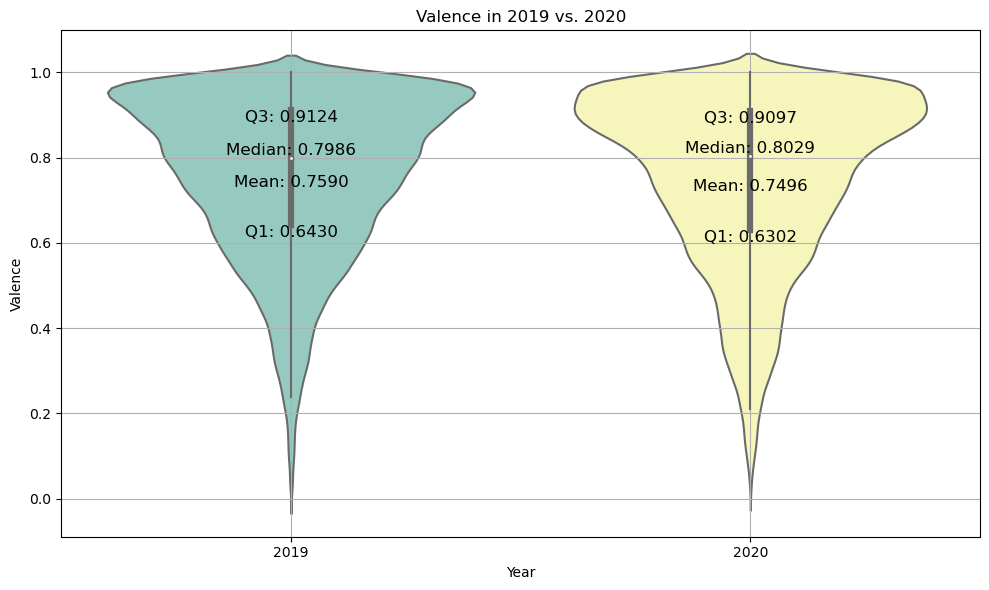

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'aus_daily_ranks' with 'scaled_adjusted_valence' and 'year' columns

# Extract the year from the 'date' column
aus_daily_ranks['year'] = aus_daily_ranks['date'].dt.year

# Filter data for the years 2019 and 2020
valence_2019 = aus_daily_ranks[aus_daily_ranks['year'] == 2019]
valence_2020 = aus_daily_ranks[aus_daily_ranks['year'] == 2020]

# Create a violin plot
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x='year', y='scaled_adjusted_valence', data=pd.concat([valence_2019, valence_2020]), palette='Set3')

plt.title('Valence in 2019 vs. 2020')
plt.xlabel('Year')
plt.ylabel('Valence')
plt.grid(True)

# Label the median, quartiles, and mean
for i, year in enumerate(['2019', '2020']):
    data = pd.concat([valence_2019, valence_2020])[pd.concat([valence_2019, valence_2020])['year'] == int(year)]
    median_val = data['scaled_adjusted_valence'].median()
    q1_val = data['scaled_adjusted_valence'].quantile(0.25)
    q3_val = data['scaled_adjusted_valence'].quantile(0.75)
    mean_val = data['scaled_adjusted_valence'].mean()
    
    ax.text(i, median_val, f'Median: {median_val:.4f}', horizontalalignment='center', verticalalignment='bottom', fontsize=12)
    ax.text(i, q1_val, f'Q1: {q1_val:.4f}', horizontalalignment='center', verticalalignment='top', fontsize=12)
    ax.text(i, q3_val, f'Q3: {q3_val:.4f}', horizontalalignment='center', verticalalignment='top', fontsize=12)
    ax.text(i, mean_val, f'Mean: {mean_val:.4f}', horizontalalignment='center', verticalalignment='top', fontsize=12)

plt.tight_layout()
plt.show()


In [27]:
# Calculate the Pearson correlation coefficient
pearson_corr, _ = stats.pearsonr(merged_df['stringency_index'], merged_df['valence'])

print(f"Pearson Correlation Coefficient: {pearson_corr:.2f}")


Pearson Correlation Coefficient: 0.01


In [28]:
import scipy.stats as stats

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(valence_2019, valence_2020)

# Print the results
print(f"T-Statistic: {t_statistic:.2f}")
print(f"P-Value: {p_value:.5f}")

# Check if the difference is statistically significant
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("The difference in valence between 2019 and 2020 is statistically significant.")
else:
    print("There is no statistically significant difference in valence between 2019 and 2020.")


TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

In [ ]:
merged_df['valence'].dtypes

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filter data for the year 2020
start_date = '2020-01-01'
end_date = '2020-12-31'

# Convert date columns to datetime type
global_daily_ranks['date'] = pd.to_datetime(global_daily_ranks['date'])
aus_daily_ranks['date'] = pd.to_datetime(aus_daily_ranks['date'])

# Group by month and calculate monthly average valence for 2020
global_avg_valence_2020 = global_daily_ranks[(global_daily_ranks['date'] >= start_date) & (global_daily_ranks['date'] <= end_date)].groupby(pd.Grouper(key='date', freq='M'))['valence'].mean().reset_index()
aus_avg_valence_2020 = aus_daily_ranks[(aus_daily_ranks['date'] >= start_date) & (aus_daily_ranks['date'] <= end_date)].groupby(pd.Grouper(key='date', freq='M'))['valence'].mean().reset_index()

# Create two separate plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the global average valence for 2020 as a bar graph
ax1.bar(global_avg_valence_2020['date'], global_avg_valence_2020['valence'], color='orange', width=20, label='Global Average Valence (2020)')

ax1.set_xlabel('Month')
ax1.set_ylabel('Average Valence')
ax1.set_title('Global Average Valence (2020) - Monthly')
ax1.grid(True)
ax1.legend()

# Plot the Australian average valence for 2020 as a bar graph
ax2.bar(aus_avg_valence_2020['date'], aus_avg_valence_2020['valence'], color='blue', width=20, label='Australian Average Valence (2020)')

ax2.set_xlabel('Month')
ax2.set_ylabel('Average Valence')
ax2.set_title('Australian Average Valence (2020) - Monthly')
ax2.grid(True)
ax2.legend()

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


/var/folders/50/6zclk4957ygc468lz_x8jjt80000gn/T/ipykernel_25374/2049596552.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020['adjusted_valence_popularity'] = data_2020['valence'] * (data_2020['popularity'])
/var/folders/50/6zclk4957ygc468lz_x8jjt80000gn/T/ipykernel_25374/2049596552.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020['scaled_adjusted_valence'] = (data_2020['adjusted_valence_popularity'] - min_val) / (max_val - min_val)


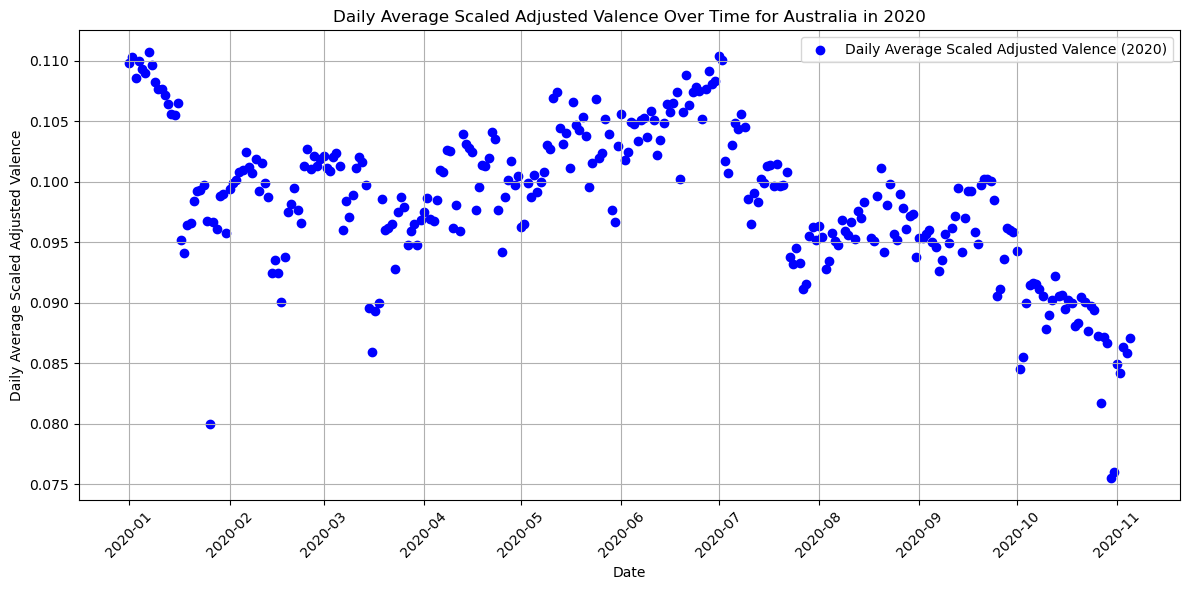

In [29]:
# Filter data for the year 2020
start_date = '2020-01-01'
end_date = '2020-12-31'
data_2020 = aus_daily_ranks[(aus_daily_ranks['date'] >= start_date) & (aus_daily_ranks['date'] <= end_date)]

# Calculate new adjusted valence by popularity for 2020
data_2020['adjusted_valence_popularity'] = data_2020['valence'] * (data_2020['popularity'])

# Normalize adjusted valence to have a range from 0 to 1
min_val = data_2020['adjusted_valence_popularity'].min()
max_val = data_2020['adjusted_valence_popularity'].max()
data_2020['scaled_adjusted_valence'] = (data_2020['adjusted_valence_popularity'] - min_val) / (max_val - min_val)

# Calculate the baseline valence for 2019
start_date_2019 = '2019-01-01'
end_date_2019 = '2019-12-31'
data_2019 = aus_daily_ranks[(aus_daily_ranks['date'] >= start_date_2019) & (aus_daily_ranks['date'] <= end_date_2019)]
baseline_valence_2019 = data_2019['scaled_adjusted_valence'].mean()

# Calculate the daily average of scaled_adjusted_valence for 2020
daily_avg_valence_2020 = data_2020.groupby('date')['scaled_adjusted_valence'].mean().reset_index()

# Create a line graph for the daily average of 'scaled_adjusted_valence' in 2020
plt.figure(figsize=(12, 6))
plt.scatter(daily_avg_valence_2020['date'], daily_avg_valence_2020['scaled_adjusted_valence'], color='blue', label='Daily Average Scaled Adjusted Valence (2020)')
plt.xlabel('Date')
plt.ylabel('Daily Average Scaled Adjusted Valence')
plt.title('Daily Average Scaled Adjusted Valence Over Time for Australia in 2020')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
print(data_2019['scaled_adjusted_valence'].mean())

In [ ]:
print(data_2020['scaled_adjusted_valence'].mean())

In [ ]:
# Load the stringency data
stringency = pd.read_csv('/Users/khanhnguyen/UNI/S2_2023/Grand Challenges/owid-covid-data.csv')

# Filter data for Australia
aus_stringency = stringency[stringency['location'] == 'Australia']
aus_stringency['date'] = pd.to_datetime(aus_stringency['date'])

# Define the date range
start_date = pd.Timestamp("2019-01-01")
end_date = pd.Timestamp("2020-12-27")

# Filter aus_stringency based on the date range and select relevant columns
filtered_aus_stringency = aus_stringency[(aus_stringency['date'] >= start_date) & (aus_stringency['date'] <= end_date)]
filtered_aus_stringency = filtered_aus_stringency[['date', 'stringency_index', 'new_cases_per_million','new_deaths_per_million','icu_patients_per_million','new_cases']]

# Load aus_daily_ranks data (assuming it has been defined previously)
avg = data_2020[['position','date', 'log_ratio', 'adjusted_valence_popularity', 'scaled_adjusted_valence', 'valence', 'danceability', 'energy', 'sadness_norm2', 'popularity']]

# Merge the dataframes on the 'date' column
merged_df = pd.merge(avg, filtered_aus_stringency, on='date', how='inner')

# Save the merged data to a CSV file
merged_df.to_csv('australia_data_final.csv', index=False)

In [30]:
import pandas as pd
import scipy.stats as stats

# Assuming you have a DataFrame 'aus_daily_ranks' with 'scaled_adjusted_valence' and 'year' columns
# ...

# Extract the valence values for 2019 and 2020
valence_2019 = valence_2019['scaled_adjusted_valence']
valence_2020 = valence_2020['scaled_adjusted_valence']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(valence_2019, valence_2020, equal_var=False)

# Check the results
alpha = 0.05  # Significance level
print(f'T-statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')

# Determine if the difference is statistically significant
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in valence between 2019 and 2020.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in valence between 2019 and 2020.")


T-statistic: 8.6687
P-value: 0.0000
Reject the null hypothesis: There is a statistically significant difference in valence between 2019 and 2020.


In [31]:
import pandas as pd
import scipy.stats as stats

# Assuming you have a DataFrame 'aus_daily_ranks' with 'scaled_adjusted_valence' and 'year' columns
# ...

# Extract the valence values for 2019 and 2020
valence_2019 = aus_daily_ranks[aus_daily_ranks['year'] == 2019]['scaled_adjusted_valence']
valence_2020 = aus_daily_ranks[aus_daily_ranks['year'] == 2020]['scaled_adjusted_valence']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(valence_2019, valence_2020, equal_var=False)

# Significance level
alpha = 0.05

# Print the results in a formatted way
print(f'T-Test Results:')
print(f'  T-Statistic: {t_stat:.4f}')
print(f'  P-Value: {p_value:.4f}')

# Determine if the difference is statistically significant
if p_value < alpha:
    print('\nConclusion:')
    print("  Reject the null hypothesis:")
    print(f'  There is a statistically significant difference in valence between 2019 and 2020 at {alpha * 100}% confidence level.')
else:
    print('\nConclusion:')
    print("  Fail to reject the null hypothesis:")
    print(f'  There is no statistically significant difference in valence between 2019 and 2020 at {alpha * 100}% confidence level.')


T-Test Results:
  T-Statistic: 8.6687
  P-Value: 0.0000

Conclusion:
  Reject the null hypothesis:
  There is a statistically significant difference in valence between 2019 and 2020 at 5.0% confidence level.
